
# Testes Paramétricos vs. Não Paramétricos

**Testes Paramétricos:**

Testes paramétricos assumem que os dados seguem uma distribuição específica (geralmente a distribuição normal).
Assumptions: Dependem de pressupostos rigorosos, como a normalidade dos dados, homogeneidade das variâncias e linearidade.

Exemplos: Teste t de Student, ANOVA.

Vantagens: Tendem a ser mais poderosos (maior capacidade de detectar um efeito quando ele realmente existe) quando as condições são atendidas.

Desvantagens: Não são apropriados para dados que não atendem aos pressupostos.

**Testes Não Paramétricos:**

Testes não paramétricos não assumem uma distribuição específica para os dados.

Assumptions: Fazem menos suposições sobre a forma da distribuição dos dados.

Exemplos: Teste de Wilcoxon, teste de Mann-Whitney, teste qui-quadrado.

Vantagens: Podem ser usados para dados que não atendem aos pressupostos dos testes paramétricos, como dados não normalmente distribuídos ou com variâncias heterogêneas.

Desvantagens: Geralmente menos poderosos que os testes paramétricos quando as condições paramétricas são atendidas.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Teste de Normalidade

H0: Hipótese de que a amostra é proveniente de uma distribuição normal

Rejeitar H0 se p <= 0,05

In [ ]:
## importando a biblioteca scipy

from scipy.stats import normaltest

In [ ]:
## definindo significancia, probabilidade de estar errado

significancia = 0.05

<Axes: >

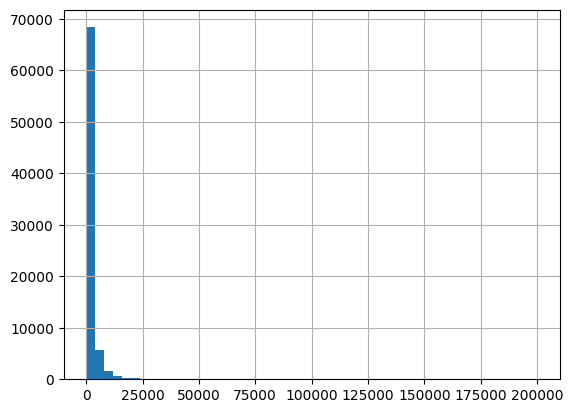

In [ ]:
## criando o grafico para ver se parece uma distribuição normal

dados.Renda.hist(bins = 50)

A função normaltest testa a hipótese nula de que a amostra é proveniente de uma distribuição normal

In [ ]:
## aqui vamos usar normaltest() para verificar se a variável renda é uma distribuição normal
## salvamos o resultado em duas variáveis.


stat_test, p_valor = normaltest(dados.Renda)
stat_test, p_valor

(152380.75803960307, 0.0)

In [ ]:
## confirmando que o p valor é menor que a significancia (0.05), logo rejeitar H0
## não é uma distribuição normal

p_valor <= significancia

True

Testando a variável Altura

<Axes: >

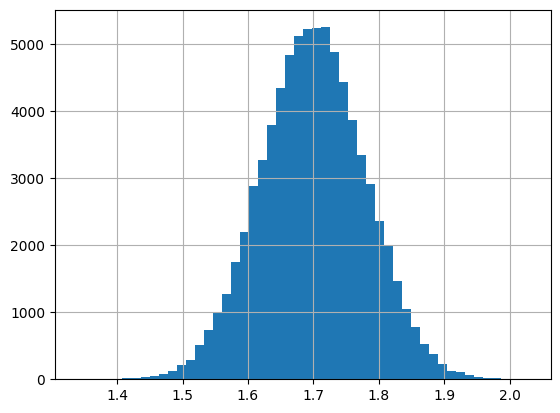

In [ ]:
dados.Altura.hist(bins = 50)

In [ ]:
## testando com normaltest()
## altura tem uma distribuição normal

stat_test, p_valor = normaltest(dados.Altura)
stat_test, p_valor

p_valor <= significancia

False

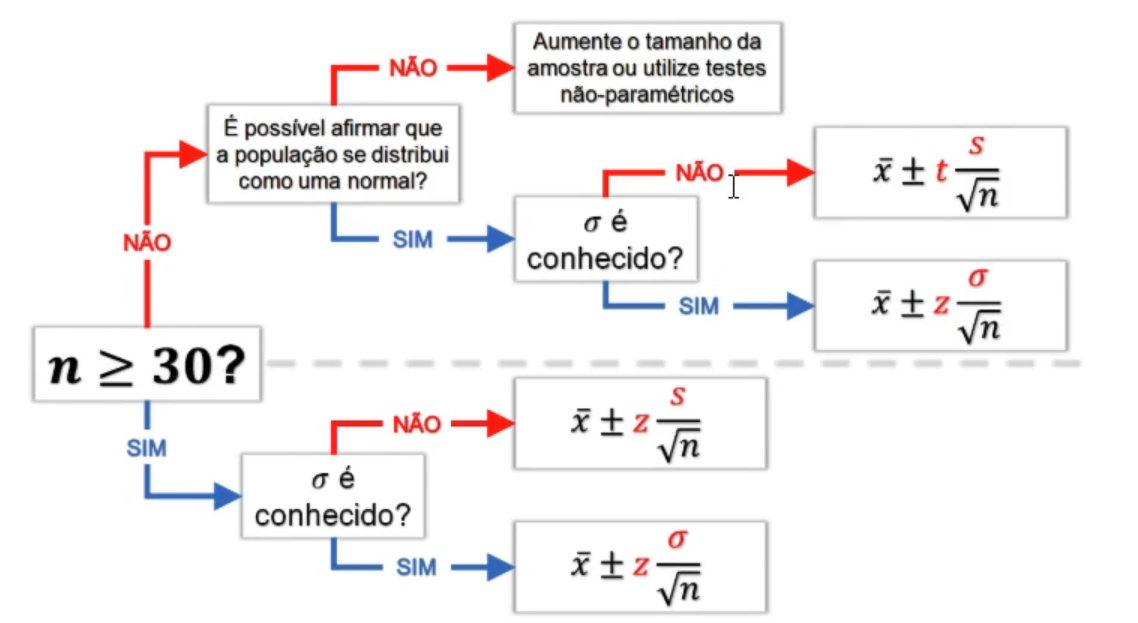

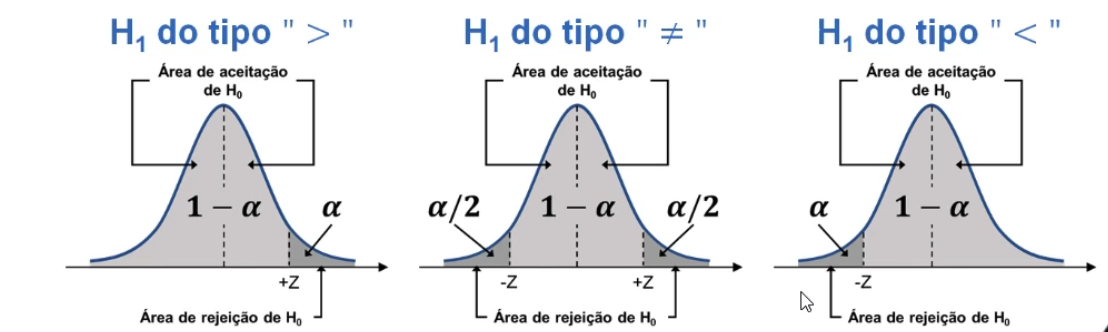

# Teste bicaudal

Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma distribuição normal e que o desvio padrão populacional é igual a 20 g. Considerando um nível de significância igual a 5%, responda as seguintes questões:

1) Qual a hipótese nula a ser testada?

2) Qual o valor da estatística de teste?

3) Qual a conclusão do teste?

In [ ]:
from scipy.stats import norm
import numpy as np


media_amostra = 485
desvio_padrao = 20
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 30

probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

z = (media_amostra - media) / (desvio_padrao / np.sqrt(n))

print('z =', round(z, 4))
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

z = -4.1079
Rejeitar H0


# P-Valor

Considere novamente os dados do exercício anterior. Um fabricante de farinha afirma que a quantidade média de farinha nas embalagens de seu principal produto é de 500 g. Um teste de pesagem em 30 embalagens amostradas ao acaso mostrou um peso médio igual à 485 g. Estudos anteriores afirmam que a distribuição dos pesos segue uma normal e que o desvio padrão populacional é igual a 20 g. Com um nível de significância igual a 5%, teste a hipótese nula de que a média do processo é igual a 500 g

In [ ]:
p_valor = 2 * (1 - norm.cdf(abs(z)))

## ou

p_valor = 2 * norm.sf(abs(z))

p_valor

3.992397476901338e-05

# Distribuição t de Student

Usado quando se tem n menor que 30. A população se distribui como uma normal e não se conhece o desvio padrão.

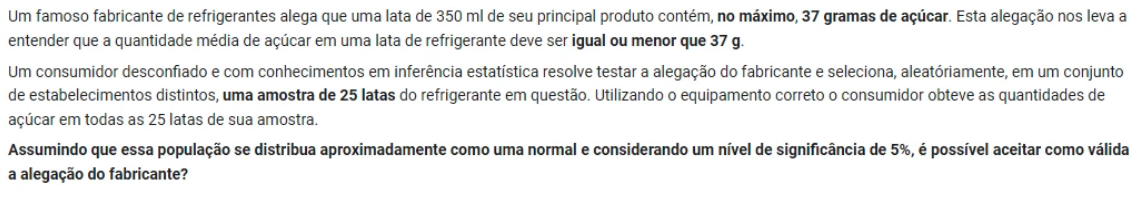

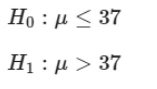

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Definindo os graus de liberdade e níveis de significância
graus_de_liberdade = np.arange(1, 31)
niveis_de_significancia = [0.10, 0.05, 0.025, 0.01, 0.005]

# Criando uma tabela vazia
tabela = pd.DataFrame(index=graus_de_liberdade, columns=niveis_de_significancia)

# Preenchendo a tabela com os valores críticos
for alfa in niveis_de_significancia:
    for df in graus_de_liberdade:
        valor_critico = t.ppf(1 - alfa, df)
        tabela.loc[df, alfa] = valor_critico

# Exibindo a tabela
print(tabela)


       0.100     0.050      0.025      0.010      0.005
1   3.077684  6.313752  12.706205  31.820516  63.656741
2   1.885618  2.919986   4.302653   6.964557   9.924843
3   1.637744  2.353363   3.182446   4.540703   5.840909
4   1.533206  2.131847   2.776445   3.746947   4.604095
5   1.475884  2.015048   2.570582    3.36493   4.032143
6   1.439756   1.94318   2.446912   3.142668   3.707428
7   1.414924  1.894579   2.364624   2.997952   3.499483
8   1.396815  1.859548   2.306004   2.896459   3.355387
9   1.383029  1.833113   2.262157   2.821438   3.249836
10  1.372184  1.812461   2.228139   2.763769   3.169273
11   1.36343  1.795885   2.200985   2.718079   3.105807
12  1.356217  1.782288   2.178813   2.680998    3.05454
13  1.350171  1.770933   2.160369   2.650309   3.012276
14   1.34503   1.76131   2.144787   2.624494   2.976843
15  1.340606   1.75305    2.13145    2.60248   2.946713
16  1.336757  1.745884   2.119905   2.583487   2.920782
17  1.333379  1.739607   2.109816   2.566934   2

## Teste unicaudal

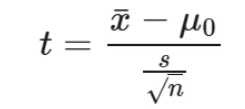

In [ ]:
import random

# Gerar 25 números aleatórios entre 35 e 37.8
# usamos random.uniform() para gerar números aleatórios float

numeros_aleatorios = [random.uniform(35, 37.8) for _ in range(25)]

# arredondando para duas casa decimais
amostra = [round(num, 2) for num in numeros_aleatorios]

amostra


[37.06,
 36.24,
 35.24,
 36.22,
 36.02,
 35.38,
 36.14,
 36.3,
 36.53,
 37.18,
 36.16,
 36.02,
 36.11,
 37.02,
 36.56,
 36.78,
 36.64,
 35.99,
 37.04,
 36.94,
 36.54,
 35.03,
 35.34,
 35.84,
 35.06]

In [ ]:
# gerando o dataframe

amostra = pd.DataFrame(amostra, columns = ['Amostra'])
amostra

,Amostra
0,37.06
1,36.24
2,35.24
3,36.22
4,36.02
5,35.38
6,36.14
7,36.30
8,36.53
9,37.18


In [ ]:
media_amostra = amostra.mean()[0]
media_amostra

36.215199999999996

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

0.638025077877037

In [ ]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

In [ ]:
from scipy.stats import t as t_student

In [ ]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

In [ ]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-6.150228472298814

In [ ]:
# Dessa forma determinamos que não podemos rejeitar H0. A alegação do fabricante é verdadeira.
t >= t_alpha

False

A empresa Limpa Esgoto garante ser capaz de realizar o tratamento de esgoto e obter, no máximo, 150 g de impurezas para cada mil litros de esgoto tratado. Vinte amostras de mil litros de esgoto apresentaram, em média, 230 g de impurezas e desvio padrão amostral igual a 90 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da empresa Limpa Esgoto?

In [ ]:
from scipy.stats import t as t_student
import numpy as np

media_amostra = 230
desvio_padrao_amostra = 90
media = 150
significancia = 0.05
confianca = 1 - significancia
n = 20
graus_de_liberdade = n - 1

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))

print('t(alpha) =', round(t_alpha, 4))
print('t =', round(t, 4))
if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t(alpha) = 1.7291
t = 3.9752
Rejeitar H0


Rejeitar H0, ou seja, a alegação da empresa não é verdadeira

## Calculando Aplicando p-valor

In [ ]:
t

3.9752319599996264

In [ ]:
p_valor = t_student.sf(t, df = 19)
p_valor

0.0004053956380615249

In [ ]:
## p valor é menor que o nível de significancia, comprovando que deve-se rejeitar H0
p_valor <= significancia

True

In [ ]:
## fazendo usando statsmodel

from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(amostra)

In [ ]:
test.ttest_mean(value = media, alternative = 'larger')

(array([-891.69535764]), array([1.]), 24.0)

A pizzaria Muito Queijo alega que a quantidade de queijo em suas pizzas tamanho família é de, no mínimo, 350 g. Uma amostra de 35 pizzas tamanho família revelou uma média de 330 g de queijo por pizza. O desvio padrão amostral foi de 80 g.

Assumindo alfa igual a 5% e população normalmente distribuída, seria possível discordar da alegação da pizzaria

In [ ]:
from scipy.stats import t as t_student
import numpy as np

media_amostra = 330
desvio_padrao_amostra = 80
media = 350
significancia = 0.05
confianca = 1 - significancia
n = 35
graus_de_liberdade = n - 1

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))

print('t(alpha) =', round(t_alpha, 4))
print('t =', round(t, 4))
if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t(alpha) = 1.6909
t = -1.479
Aceitar H0


# Teste para duas amostras

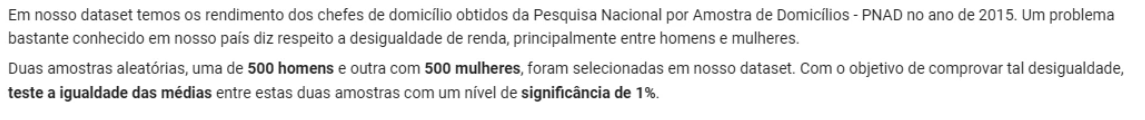

Realizando a separação das amostras

In [ ]:
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda


In [ ]:
mulheres = dados.query('Sexo == 1').sample(n = 500, random_state = 101).Renda

Dados do problema

In [ ]:
media_amostra_M = mulheres.mean()
media_amostra_H = homens.mean()

In [ ]:
desvio_padrao_amostra_M = mulheres.std()
desvio_padrao_amostra_H = homens.std()

In [ ]:
## D_0 seria a diferênça entre as médias, para teste

significancia = 0.01
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0

Vamos testar para descobrir se existe diferença entre a média salarial de homem e mulher

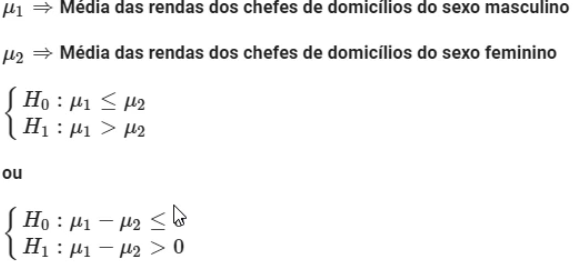

Fixando a significancia do teste

In [ ]:
probabilidade = confianca
probabilidade

0.99

In [ ]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

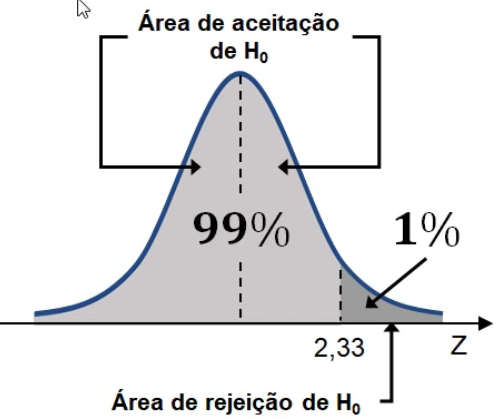

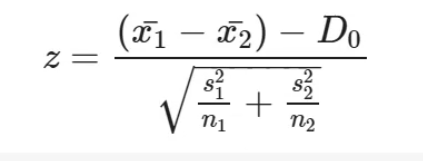

In [ ]:
numerador = (media_amostra_H - media_amostra_M) - D_0

denominador = np.sqrt((desvio_padrao_amostra_H**2 / n_H) + (desvio_padrao_amostra_M**2 / n_M))

z = numerador / denominador

z

5.8656200577647555

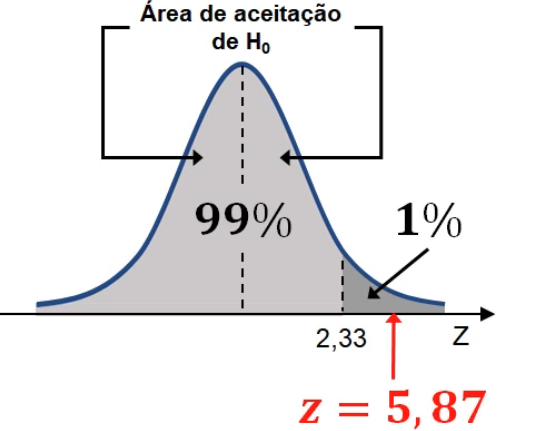

Um fabricante de cosméticos afirma que a adição de um novo composto químico em sua linha de shampoos consegue promover em mais de 2 centímetros o crescimento dos fios de cabelo em um período de 60 dias. Duas amostras de pessoas foram selecionadas e testadas, uma utilizando o shampoo novo (com o composto) e a outra com o shampoo antigo (sem o composto).

Assumindo um nível de confiança de 95% e considerando que as populações se distribuem como uma normal, podemos acreditar na afirmação do fabricante do shampoo?

Em testes entre duas amostras, quando realizamos a escolha da distribuição amostral adequada (passo 2) e perguntamos se n ≥ 30, temos que considerar que n = n1 + n2, onde n1 é o tamanho da primeira amostra e n2 o tamanho da segunda;


2) Quando n1 + n2 ≥ 30, utilizamos z (normal), e quando n1 + n2 < 30, σ não for conhecido e as populações forem normalmente distribuídas, utilizamos t (t-Student);


3) Quando utilizamos a tabela t de Student, em teste de duas amostras, os graus de liberdade são obtidos da seguinte forma: n1 + n2 - 2;

In [ ]:
from scipy.stats import t as t_student
import numpy as np
import pandas as pd

shampoo_Novo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antigo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])

media_A = shampoo_Novo.mean()
desvio_padrao_A = shampoo_Novo.std()

media_B = shampoo_Antigo.mean()
desvio_padrao_B = shampoo_Antigo.std()

significancia = 0.05
confianca = 1 - significancia
n_A = len(shampoo_Novo)
n_B = len(shampoo_Antigo)
D_0 = 2

graus_de_liberdade = n_A + n_B - 2

t_alpha = t_student.ppf(confianca, graus_de_liberdade)

numerador = (media_A - media_B) - D_0
denominador = np.sqrt((desvio_padrao_A ** 2 / n_A) + (desvio_padrao_B ** 2 / n_B))
t = numerador / denominador

print('t =', round(t, 4))

if(t >= t_alpha):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

t = 2.6646
Rejeitar H0


In [ ]:
## fazendo usando statsmodel

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [ ]:
test_H = DescrStatsW(homens)

In [ ]:
test_M = DescrStatsW(mulheres)

In [ ]:
test = test_H.get_compare(test_M)

In [ ]:
test.ztest_ind(alternative = 'larger', value = 0)

(5.865620057764754, 2.2372867859458255e-09)

In [ ]:
z, p_valor = test.ztest_ind(alternative = 'larger', value = 0)

In [ ]:
p_valor <= significancia

True

Fazendo com Comparemeans

In [ ]:
test = CompareMeans(DescrStatsW(homens), DescrStatsW(mulheres))

In [ ]:
test.ztest_ind(alternative = 'larger', value = 0)

(5.865620057764754, 2.2372867859458255e-09)

# Distribuição Qui-quadrado

**Teste Qui-Quadrado**

Definição: É um teste não paramétrico usado para avaliar a associação entre variáveis categóricas.
Uso: Frequentemente usado para testar a independência entre duas variáveis categóricas em uma tabela de contingência.

Pressupostos: As amostras devem ser aleatórias, as observações devem ser independentes, e as frequências esperadas devem ser suficientemente grandes (geralmente ≥ 5).

Interpretação: Compara as frequências observadas com as frequências esperadas sob a hipótese nula de independência.

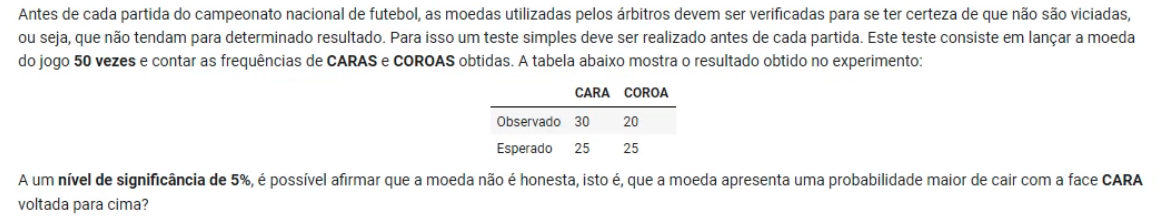

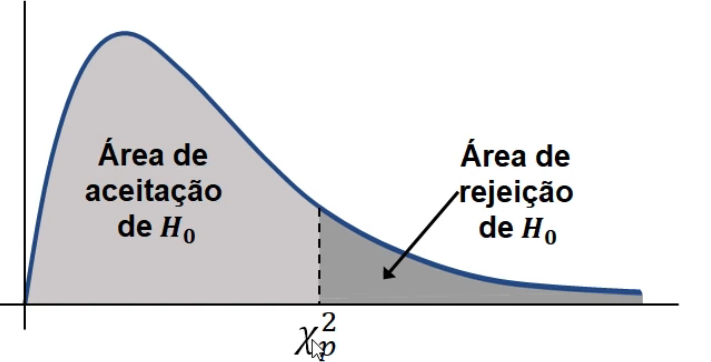

In [ ]:
## criando a tabela Qui-quadrado.

import pandas as pd
from scipy.stats import chi


tabela_t_chi = pd.DataFrame(
    [],
    index = [i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi.index:
    for column in tabela_t_chi.columns:
        tabela_t_chi.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index) **2)

tabela_t_chi.index.name = "Grau de Liberdade"
tabela_t_chi.rename_axis(['p'], axis = 1, inplace = True)

tabela_t_chi

p,0.005,0.010,0.025,0.050,0.100,0.250,0.750,0.900,0.975,0.950,0.990,0.995
Grau de Liberdade,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


In [ ]:
## dados do problema

F_observado = [17, 33]
F_esperado = [25, 25]
significancia = 0.05
confianca = 1 - significancia
k = 2 ## número de eventos possíveis
graus_de_liberdade = k - 1

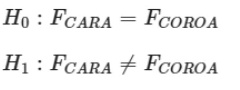

In [ ]:
tabela_t_chi[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.750,0.900,0.975,0.950,0.990,0.995
Grau de Liberdade,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


In [ ]:
## Podemos pegar o valor na tabela ou através do código abaixo

chi_a_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_a_alpha

3.8414588206941245

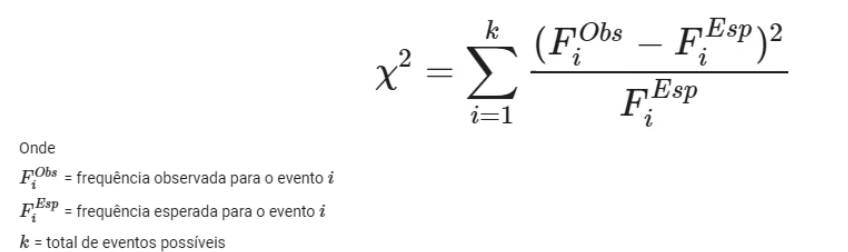

In [ ]:
## realizando o cálculo

chi_2 = ((F_observado[0] - F_esperado[0]) ** 2 / F_esperado[0]) + ((F_observado[1] - F_esperado[1]) ** 2 / F_esperado[1])
chi_2

5.12

In [ ]:
## realizando o cálculo com for

chi_2 = 0
for i in range(k):
  chi_2 += (F_observado[i] - F_esperado[i]) ** 2 / F_esperado[i]

chi_2


5.12

In [ ]:
chi_2 > chi_a_alpha

True

Rejeitamos H0. a Frequência observada e esperada são discrepantes.

Pegando o p-valor

In [ ]:
chi_2

5.12

In [ ]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

2.262741699796952

In [ ]:
p_valor = chi.sf(raiz_chi_2, graus_de_liberdade)
p_valor

0.023651616655356

## melhor forma de realizar o cálculo

In [ ]:
from scipy.stats import chisquare

In [ ]:
chisquare(f_obs = F_observado, f_exp = F_esperado)


Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

In [ ]:
chi_2, p_valor = chisquare(f_obs = F_observado, f_exp = F_esperado)
print(chi_2, p_valor)

5.12 0.023651616655356


# Teste de Wilcoxon

**Teste de Wilcoxon**

Definição: Também conhecido como Teste de Sinais de Wilcoxon, é um teste não paramétrico usado para comparar duas amostras emparelhadas.

Uso: Utilizado quando as amostras não atendem aos pressupostos do teste t de amostras emparelhadas.
Pressupostos: Amostras pareadas e independentes, dados em escala ordinal ou intervalar.

Interpretação: Avalia se as diferenças entre pares de observações são simetricamente distribuídas ao redor de zero.

O teste de Wilcoxon é aplicado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Também pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

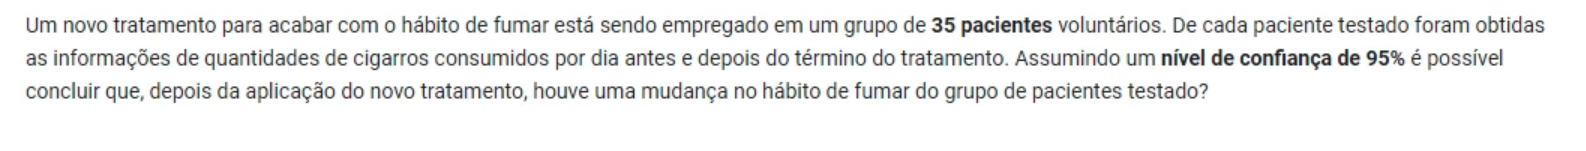

In [ ]:
## criando a amostra

fumo = {
    'Antes': [antes := random.randint(10, 50) for _ in range(35)],
    'Depois': [depois := random.randint(0, 19) for _ in range(35)]
}
fumo

{'Antes': [45,
  30,
  42,
  22,
  44,
  27,
  48,
  50,
  50,
  46,
  45,
  32,
  36,
  24,
  20,
  48,
  21,
  18,
  21,
  38,
  20,
  35,
  45,
  39,
  26,
  22,
  34,
  38,
  19,
  29,
  39,
  44,
  45,
  48,
  32],
 'Depois': [9,
  9,
  6,
  17,
  3,
  11,
  4,
  11,
  5,
  11,
  2,
  17,
  17,
  17,
  0,
  7,
  15,
  12,
  7,
  14,
  8,
  17,
  6,
  0,
  15,
  15,
  5,
  9,
  10,
  9,
  11,
  9,
  11,
  16,
  9]}

In [ ]:
significancia = 0.05
confianca = 1 - significancia
n = 35

In [ ]:
## criando o df

fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,45,9
1,30,9
2,42,6
3,22,17
4,44,3


In [ ]:
## pegando as médias

media_antes = fumo.Antes.mean()
media_depois = fumo.Depois.mean()

print(f'Média antes: {media_antes:.2f}')
print(f'Média depois: {media_depois:.2f}')

Média antes: 34.91
Média depois: 9.83


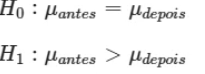

In [ ]:
probabilidade = (0.5 + (confianca  / 2))
probabilidade

0.975

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

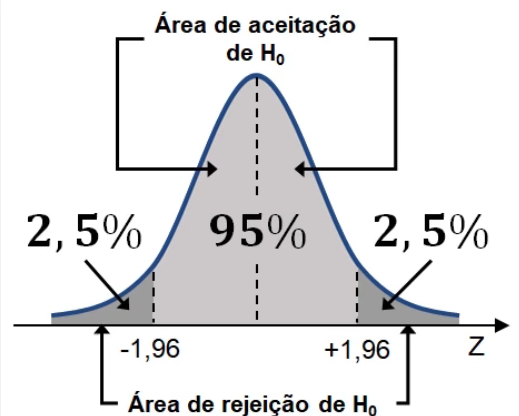

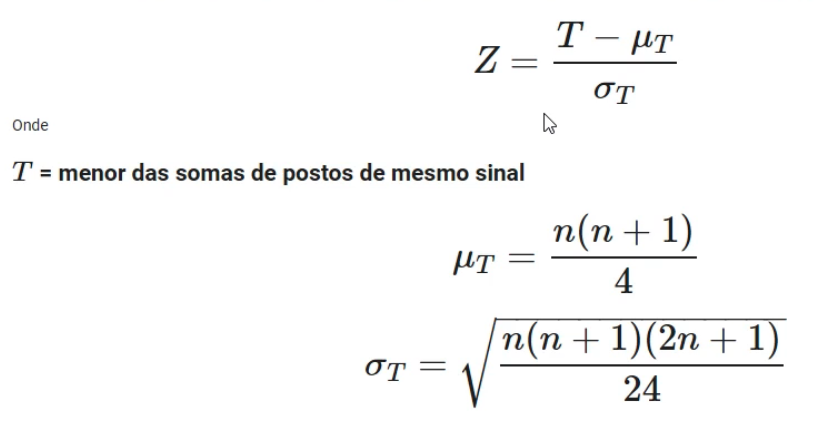

In [ ]:
## criando uma coluna com as diferenças de antes e depois
fumo['Dif'] = fumo.Depois - fumo.Antes
fumo.head()

,Antes,Depois,Dif
0,45,9,-36
1,30,9,-21
2,42,6,-36
3,22,17,-5
4,44,3,-41


In [ ]:
## usando .abs para ignorar os sinais negativos

fumo['|Dif|'] = fumo.Dif.abs()
fumo.head()

,Antes,Depois,Dif,|Dif|
0,45,9,-36,36
1,30,9,-21,21
2,42,6,-36,36
3,22,17,-5,5
4,44,3,-41,41


In [ ]:
## ordenando conforme os valores da coluna |Dif|

fumo.sort_values(by = '|Dif|', inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|
3,22,17,-5,5
17,18,12,-6,6
16,21,15,-6,6
25,22,15,-7,7
13,24,17,-7,7


In [ ]:
## criando uma coluna de contagem

fumo['Contagem'] = range(1, len(fumo) + 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Contagem
3,22,17,-5,5,1
17,18,12,-6,6,2
16,21,15,-6,6,3
25,22,15,-7,7,4
13,24,17,-7,7,5


In [ ]:
## usando groupby para pegar a média de diferenças
posto = fumo[['|Dif|', 'Contagem']].groupby(['|Dif|']).mean()
posto

,Contagem
|Dif|,
5,1.0
6,2.5
7,4.5
9,6.0
11,7.0
12,8.0
14,9.0
15,10.0
16,11.0


In [ ]:
posto.reset_index(inplace = True)
posto

,|Dif|,Contagem
0,5,1.0
1,6,2.5
2,7,4.5
3,9,6.0
4,11,7.0
5,12,8.0
6,14,9.0
7,15,10.0
8,16,11.0
9,18,12.0


In [ ]:
fumo.drop(['Contagem'], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|
3,22,17,-5,5
17,18,12,-6,6
16,21,15,-6,6
25,22,15,-7,7
13,24,17,-7,7


In [ ]:
fumo = fumo.merge(posto, left_on= '|Dif|', right_on = '|Dif|', how = 'left')
fumo.head()

,Antes,Depois,Dif,|Dif|,Contagem
0,22,17,-5,5,1.0
1,18,12,-6,6,2.5
2,21,15,-6,6,2.5
3,22,15,-7,7,4.5
4,24,17,-7,7,4.5


In [ ]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Contagem if x.Dif > 0 else 0, axis = 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Contagem,Posto (+)
0,22,17,-5,5,1.0,0
1,18,12,-6,6,2.5,0
2,21,15,-6,6,2.5,0
3,22,15,-7,7,4.5,0
4,24,17,-7,7,4.5,0


In [ ]:
fumo['Posto (-)'] = fumo.apply(lambda x: x.Contagem if x.Dif < 0 else 0, axis = 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Contagem,Posto (+),Posto (-)
0,22,17,-5,5,1.0,0,1.0
1,18,12,-6,6,2.5,0,2.5
2,21,15,-6,6,2.5,0,2.5
3,22,15,-7,7,4.5,0,4.5
4,24,17,-7,7,4.5,0,4.5


In [ ]:
fumo.drop(['Contagem'], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto (+),Posto (-)
0,22,17,-5,5,0,1.0
1,18,12,-6,6,0,2.5
2,21,15,-6,6,0,2.5
3,22,15,-7,7,0,4.5
4,24,17,-7,7,0,4.5


In [ ]:
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())
T

0

In [ ]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

In [ ]:
sigma_T = np.sqrt((n * (n + 1) * (2 * n + 1)) / 24)
sigma_T

61.053255441458646

In [ ]:
Z = (T - mu_T) / sigma_T
Z

-5.159430037306365

In [ ]:
Z <= -z_alpha_2

True

## Outra forma de calcular

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
## ele já reporta o valor t e o p-valor

wilcoxon(fumo['Antes'], fumo['Depois'])

WilcoxonResult(statistic=0.0, pvalue=5.820766091346741e-11)

In [ ]:
t, p_valor = wilcoxon(fumo['Antes'], fumo['Depois'])

In [ ]:
p_valor <= significancia

True

Desconfiado da eficiência dos cursos e materiais de estudo online da Alura, um professor resolveu realizar um teste com um grupo de 14 alunos de sua classe. Para isto, ele submeteu estes alunos a duas etapas distintas e logo depois de cada etapa, aplicou uma avaliação. Na etapa inicial, foram oferecidas aulas normais, sem a utilização do material de apoio da Alura. Na segunda etapa, foram também oferecidas aulas normais, mas com a utilização do material de apoio da Alura. As notas obtidas pelos alunos estão na tabela abaixo:

In [ ]:
from scipy.stats import wilcoxon

sem_Alura = pd.Series([ 7,  8, 6, 6, 10, 4, 2, 5,  9, 2, 4, 9, 1, 10])
com_Alura = pd.Series([10, 10, 9, 9,  9, 7, 5, 8, 10, 6, 3, 7, 4,  8])

significancia = 0.10

T, p_valor = wilcoxon(sem_Alura, com_Alura)
print('T =', T)

if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

T = 14.0
Rejeitar H0


# Teste de Mann-Whitney

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média.

**Teste de Mann-Whitney**

Definição: Também conhecido como Teste U de Mann-Whitney, é um teste não paramétrico usado para comparar duas amostras independentes.

Uso: Utilizado quando os dados não atendem aos pressupostos do teste t de amostras independentes.

Pressupostos: Amostras independentes, dados em escala ordinal ou intervalar.
Interpretação: Avalia se uma amostra tende a ter valores maiores ou menores do que a outra amostra.

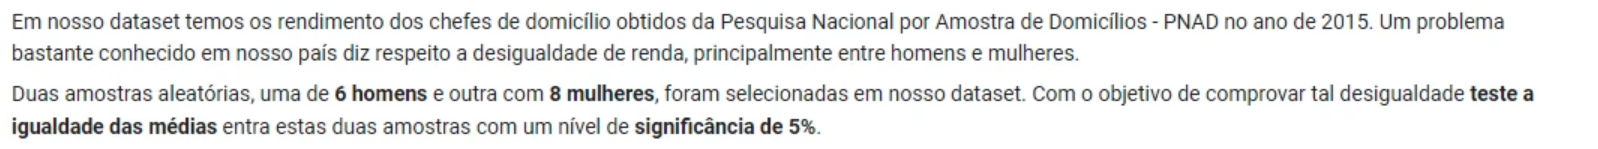

In [ ]:
## seleção de amostras

mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda
homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda

In [ ]:
## medias

media_amostra_M = mulheres.mean()
media_amostra_H = homens.mean()

print(media_amostra_M)
print(media_amostra_H)

1090.75
1341.6666666666667


In [ ]:
## outros dados do problema

significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)
n_2 = len(mulheres)

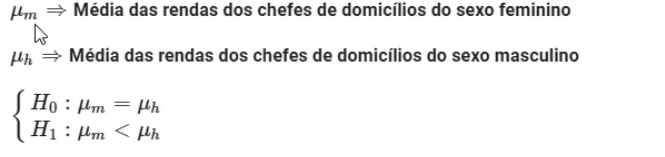

In [ ]:
graus_de_liberdade = n_1 + n_2 - 2
graus_de_liberdade

12

In [ ]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

-1.78

Obtendo os postos


In [ ]:
H = pd.DataFrame(homens)
H['Sexo'] = 'Homens'
M = pd.DataFrame(mulheres)
M['Sexo'] = 'Mulheres'

In [ ]:
H

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens
17422,1200,Homens


In [ ]:
M

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres
24707,400,Mulheres
60340,700,Mulheres
17035,788,Mulheres


In [ ]:
import pandas as pd # Import the pandas library

sexo = pd.concat([H, M], ignore_index=True) # Use pd.concat to combine the DataFrames
sexo.reset_index(inplace=True, drop = True)
sexo

,Renda,Sexo
0,1200,Homens
1,2000,Homens
2,850,Homens
3,800,Homens
4,2000,Homens
5,1200,Homens
6,1100,Mulheres
7,400,Mulheres
8,788,Mulheres
9,4300,Mulheres


In [ ]:
sexo.sort_values('Renda', inplace=True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [ ]:
sexo['Posto'] = range(1, len(sexo) + 1)
sexo

,Renda,Sexo,Posto
10,250,Mulheres,1
7,400,Mulheres,2
11,400,Mulheres,3
12,700,Mulheres,4
8,788,Mulheres,5
13,788,Mulheres,6
3,800,Homens,7
2,850,Homens,8
6,1100,Mulheres,9
0,1200,Homens,10


In [ ]:
posto = sexo[['Renda', 'Posto']].groupby('Renda').mean()
posto

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0
850,8.0
1100,9.0
1200,10.5
2000,12.5


In [ ]:
posto.reset_index(inplace=True)
posto

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0
5,850,8.0
6,1100,9.0
7,1200,10.5
8,2000,12.5
9,4300,14.0


In [ ]:
sexo.drop(['Posto'], axis = 1, inplace = True)
sexo

,Renda,Sexo
10,250,Mulheres
7,400,Mulheres
11,400,Mulheres
12,700,Mulheres
8,788,Mulheres
13,788,Mulheres
3,800,Homens
2,850,Homens
6,1100,Mulheres
0,1200,Homens


In [ ]:
sexo = sexo.merge(posto, left_on='Renda', right_on='Renda', how = 'left')
sexo


,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


## obtendo R

In [ ]:
Temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()
Temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [ ]:
R_1 = Temp.loc['Homens'][0]
R_1

61.0

In [ ]:
R_2 = Temp.loc['Mulheres'][0]
R_2

44.0

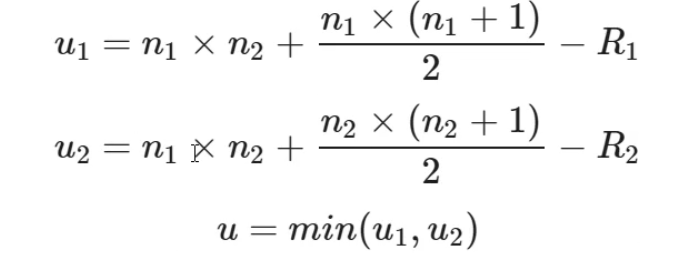

In [ ]:
u_1 = n_1 * n_2 + (n_1 * (n_1 + 1)) / ((2)) - R_1
u_1

8.0

In [ ]:
u_2 = n_1 * n_2 + (n_2 * (n_2 + 1)) / ((2)) - R_2
u_2

40.0

In [ ]:
u = min(u_1, u_2)
u

8.0

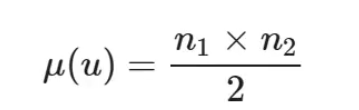

In [ ]:
mu_u = (n_1 * n_2) / 2
mu_u

24.0

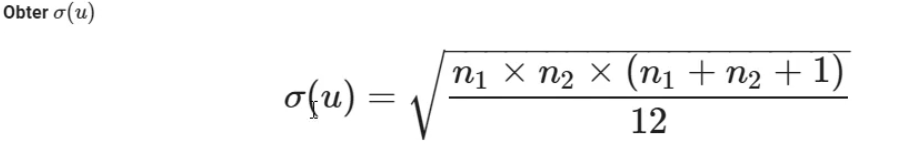

In [ ]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

7.745966692414834

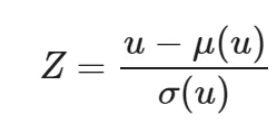

In [ ]:
Z = (u - mu_u) / sigma_u
Z.round(2)

-2.07

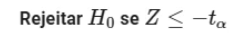

In [ ]:
Z <= t_alpha

True

## Maneira mais simples de realizar o cálculo

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
mannwhitneyu(mulheres, homens, alternative='less')

MannwhitneyuResult(statistic=8.0, pvalue=0.022221119551528605)

In [ ]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')

In [ ]:
p_valor <= significancia

True

Um professor acredita que alunos que praticam exercícios físicos têm uma performance média escolar superior àquela obtida por alunos que não praticam. Para provar sua teoria, selecionou duas amostras aleatórias, uma com 9 alunos que não praticam exercícios físicos e outra com 10 alunos que cultivam o hábito de se exercitar.

Teste a hipótese da média das notas dos alunos que praticam exercícios ser maior que a média das notas dos alunos que não praticam. Assinale a alternativa que apresenta o resultado do teste (estatística de teste u e decisão do teste). Considere um nível de significância de 10%.

In [ ]:
from scipy.stats import mannwhitneyu


Sem_ex = pd.Series([ 7, 6, 7, 8, 6, 8, 6, 9, 5])
Com_ex= pd.Series([8, 7, 6, 6, 8, 6, 10, 6, 7, 8])

significancia = 0.10

u, p_valor = mannwhitneyu(Com_ex, Sem_ex, alternative='less')

print (u, p_valor)
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

50.0 0.6797624859353419
Aceitar H0


# Resumo das Diferenças

Teste Qui-Quadrado: Avalia a associação entre variáveis categóricas.

Teste de Wilcoxon: Compara amostras emparelhadas ou relacionadas.

Teste de Mann-Whitney: Compara duas amostras independentes.